In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### a

In [10]:
wine_data = pd.read_csv("winequality-red.csv", sep=";")  

print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### b

In [3]:
X = wine_data.drop('quality', axis = 1)  
y = wine_data['quality']              

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Set Shape: ", X_train.shape, y_train.shape)
print("Validation Set Shape: ", X_val.shape, y_val.shape)
print("Test Set Shape: ", X_test.shape, y_test.shape)

Training Set Shape:  (959, 11) (959,)
Validation Set Shape:  (320, 11) (320,)
Test Set Shape:  (320, 11) (320,)


### c

In [4]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

X_train_bias = np.c_[np.ones(X_train_np.shape[0]), X_train_np]

# Closed-form solution: w = (X^T * X)^(-1) * X^T * y
# X^T * X
XtX = np.dot(X_train_bias.T, X_train_bias)

# nverse of X^T * X
XtX_inv = np.linalg.inv(XtX)

# X^T * y
Xty = np.dot(X_train_bias.T, y_train_np)

weights = np.dot(XtX_inv, Xty)

print("Weights:")
print(weights)

intercept = weights[0]
coefficients = weights[1:]

print("\nIntercept:", intercept)
print("Coefficients:", coefficients)

def predict(X, weights):
    X_bias = np.c_[np.ones(X.shape[0]), X]  
    return np.dot(X_bias, weights)

y_pred = predict(X_val.to_numpy(), weights)

mse = np.mean((y_val.to_numpy() - y_pred) ** 2)
print("\nMean Squared Error:", mse)

Weights (coefficients):
[ 3.20339193e+01  2.46399813e-02 -1.22503466e+00 -3.40497461e-01
  2.39090277e-02 -1.72273463e+00  2.83923311e-03 -3.09239574e-03
 -2.80998968e+01 -3.22429499e-01  7.14378588e-01  2.80982010e-01]

Intercept: 32.0339193296677
Coefficients: [ 2.46399813e-02 -1.22503466e+00 -3.40497461e-01  2.39090277e-02
 -1.72273463e+00  2.83923311e-03 -3.09239574e-03 -2.80998968e+01
 -3.22429499e-01  7.14378588e-01  2.80982010e-01]

Mean Squared Error on Validation Data: 0.39229584167303005


### d

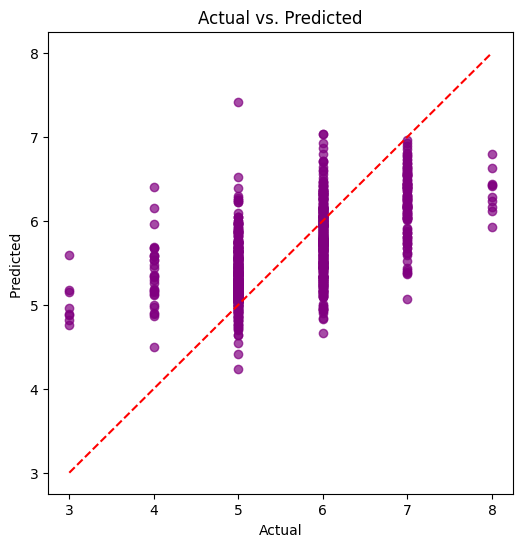

In [12]:
y_train_pred = predict(X_train_np, weights)

# Plot actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_train_np, y_train_pred, alpha=0.7, color="purple")
plt.plot([min(y_train_np), max(y_train_np)], [min(y_train_np), max(y_train_np)], color="red", linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.title("Actual vs. Predicted")
plt.show()

Majority of the points are clustered near the red  line, indicating that the model generally makes accurate predictions. The most devaiation occurs for target values  4 and 8, where prediction errors are larger. 

### e

In [6]:

def calculate_rmse(y_actual, y_pred):
    mse = np.mean((y_actual - y_pred) ** 2) 
    rmse = np.sqrt(mse) 
    return rmse

y_train_pred = predict(X_train_np, weights)  
y_test_pred = predict(X_test.to_numpy(), weights)  

rmse_train = calculate_rmse(y_train_np, y_train_pred)
rmse_test = calculate_rmse(y_test.to_numpy(), y_test_pred)

print(f"RMSE on Training Set: {rmse_train}")
print(f"RMSE on Test Set: {rmse_test}")

Root Mean Square Error (RMSE) on Training Set: 0.6435674112932496
Root Mean Square Error (RMSE) on Test Set: 0.6836335915791768


### f

In [13]:
def normalize_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def least_mean_squares(X, y, learning_rate, epochs):
    np.random.seed(19)  
    weights = np.random.randn(X.shape[1] + 1)  

    X_bias = np.c_[np.ones(X.shape[0]), X]

    errors = []

    for epoch in range(epochs):
        y_pred = np.dot(X_bias, weights)

        error = y - y_pred

        gradient = -2 * np.dot(X_bias.T, error) / X.shape[0]
        weights -= learning_rate * gradient

        mse = np.mean(error**2)
        errors.append(mse)

    return weights, errors

#normalize
X_train_np_scaled = normalize_features(X_train_np)

learning_rate = 0.001  
epochs = 1000
weights_lms, mse_errors = least_mean_squares(X_train_np_scaled, y_train_np, learning_rate, epochs)

print("Weights (LMS):", weights_lms)

Weights (LMS): [ 4.9046946  -0.46088444 -0.43987662 -0.28759709 -0.23688095  0.03982265
  0.2074174  -0.15344272  0.45762005 -0.64230111 -0.29484888  0.68806729]


### g

In [14]:
def calculate_rmse(y_actual, y_pred):
    mse = np.mean((y_actual - y_pred) ** 2)  
    rmse = np.sqrt(mse)  
    return rmse

def predict_lms(X, weights):
    X_bias = np.c_[np.ones(X.shape[0]), X]  
    return np.dot(X_bias, weights)

X_test_np_scaled = normalize_features(X_test.to_numpy())

y_train_pred = predict_lms(X_train_np_scaled, weights_lms)  
y_test_pred = predict_lms(X_test_np_scaled, weights_lms)    

rmse_train = calculate_rmse(y_train_np, y_train_pred)
rmse_test = calculate_rmse(y_test.to_numpy(), y_test_pred)

print(f"RMSE on Training Set: {rmse_train}")
print(f"RMSE on Test Set: {rmse_test}")

RMSE on Training Set: 1.0906456577604149
RMSE on Test Set: 1.1531136691234687
